#Object Detection using Dectectron2 on custom Dataset

In this project I have detected two classes namely Alarm Clock and *Television*

In [0]:
# Import Packages
import os
import pandas as pd
import random
import cv2

In [3]:
# Install Detectron2 (locally)
import sys
!{sys.executable} -m pip install -U torch==1.4 torchvision==0.5 -f https://download.pytorch.org/whl/torch_stable.html
!{sys.executable} -m pip install cython pyyaml==5.1
!{sys.executable} -m pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
#!{sys.executable} -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 640.6MB 28kB/s 
     |████████████████████████████████| 4.0MB 23.3MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=0b3dca213db4ed575374e269f4f4d512732f50497709a306c7bdd8721fb4a040
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-b

In [4]:
# Build Detectron2 from source
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-su9t174q
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-su9t174q
  Created wheel for detectron2: filename=detectron2-0.1.3-cp36-cp36m-linux_x86_64.whl size=4511144 sha256=5da320cbd8d14d3ec580507f2a8ff1d381c8e490eae22b8c324217c8fb5ae3a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-109x31vw/wheels/33/ac/bb/5ef90585c21c67e2f0b6aae55ec6b43017ad57af33d5f4c339
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200601-cp36-none-any.whl size=41026 sha256=9af465960a62593d00ddd0c0e5d823c01cb14e30938d38d018c9cfcf8419a021
  Stored in directory: /root/.cache/pip/wheels/c7/42/48/e75a554abdabd433feeea598b9cc2db74e76eab67fbab402ab
Successfully built detectron2 fvcore


In [2]:
# Import Detectron2/requirements
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import os
import pandas as pd

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# import torch/torchvision
import torch, torchvision
torch.__version__
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [6]:
#Toolkit to instal images from google images
!git clone https://github.com/pythonlessons/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 439, done.
remote: Total 439 (delta 0), reused 0 (delta 0), pack-reused 439
Receiving objects: 100% (439/439), 34.09 MiB | 9.95 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [4]:
cd OIDv4_ToolKit

/content/OIDv4_ToolKit


In [5]:
!pip install -r requirements.txt

In [6]:
!python main.py downloader --classes  'Alarm clock' 'Television'  --type_csv train --limit 400


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Alarm clock.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 42689 KB/s, 0 seconds passed
[DOWNLOAD] | F

In [7]:
!python main.py downloader --classes  'Alarm clock' 'Television'  --type_csv validation --limit 30


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Alarm clock.
   [ERROR] | Missing the validation-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...100%, 16 MB, 31592 KB/s, 0 seconds passed
[DOWNLOAD] |

In [0]:
import os
os.mkdir("train")
os.mkdir("valid")

In [0]:
def get_image_ids(image_folder=None):
    """
    Explores a folder of images and gets their ID from their file name.
    Returns a list of all image ID's in image_folder.
    E.g. image_folder/608fda8c976e0ac.jpg -> ["608fda8c976e0ac"]
    
    Params
    ------
    image_folder (str): path to folder of images, e.g. "../validation/"
    """
    return [os.path.splitext(img_name)[0] for img_name in os.listdir(image_folder)]

In [0]:
# Now some data preprocessing in done so to geet all the images in train folder an all the validation image in validation folder

In [0]:
# Data Paths
valid_path='/content/OIDv4_ToolKit/valid'
train_path='/content/OIDv4_ToolKit/train'
target_classes=['Alarm clock' ,'Television']


In [0]:
# Make a function which formats a specific annotations csv based on what we're dealing with
def format_annotations(image_folder, annotation_file, target_classes=None):
    """
    Formats annotation_file based on images contained in image_folder.
    Will get all unique image IDs and make sure annotation_file
    only contains those (the target images).
    Adds meta-data to annotation_file such as class names and categories.
    If target_classes isn't None, the returned annotations will be filtered by this list.
    Note: image_folder and annotation_file should both be validation if working on
    validation set or both be training if working on training set.
    
    Params
    ------
    image_folder (str): path to folder of target images.
    annotation_file (str): path to annotation file of target images.
    target_classes (list), optional: a list of target classes you'd like to filter labels.
    """
    # Get all image ids from target directory
    image_ids = get_image_ids(image_folder)
    
    # Setup annotation file and classnames
    annot_file = pd.read_csv(annotation_file)
    classes = pd.read_csv("/content/OIDv4_ToolKit/OID/csv_folder/class-descriptions-boxable.csv",
                          names=["LabelName", "ClassName"])
    
    # Create classname column on annotations which converts label codes to string labels
    annot_file["ClassName"] = annot_file["LabelName"].map(classes.set_index("LabelName")["ClassName"])

    # Sort annot_file by "ClassName" for alphabetical labels (used with target_classes)
    annot_file.sort_values(by=["ClassName"], inplace=True)
    
    if target_classes:
        annot_file = annot_file[annot_file["ImageID"].isin(image_ids) & annot_file["ClassName"].isin(target_classes)]
    else:
        annot_file = annot_file[annot_file["ImageID"].isin(image_ids)]
   
    annot_file["ClassName"] = pd.Categorical(annot_file["ClassName"])
    annot_file["ClassID"] = annot_file["ClassName"].cat.codes
    
    return annot_file

In [0]:
def rel_to_absolute(bbox, height, width):
    """
    Converts bounding box dimensions from relative to absolute pixel values (Detectron2 style).
    See: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.BoxMode
    
    Params
    ------
    bbox (array): relative dimensions of bounding box in format (x0, y0, x1, y1 or Xmin, Ymin, Xmax, Ymax)
    height (int): height of image
    width (int): width of image
    """
    bbox[0] = np.round(np.multiply(bbox[0], width)) # x0
    bbox[1] = np.round(np.multiply(bbox[1], height)) # y0
    bbox[2] = np.round(np.multiply(bbox[2], width)) # x1
    bbox[3] = np.round(np.multiply(bbox[3], height)) # y1
    return [i.astype("object") for i in bbox] # convert all to objects for JSON saving

In [0]:
import numpy as np
from detectron2.structures import BoxMode
import json
import os

def get_image_dicts(image_folder, annotation_file, target_classes=None):
    """
    Create JSON of dectectron2 style labels to be reused later.
    
    
    Params
    ------
    image_folder (str): target folder containing images
    annotations (DataFrame): DataFrame of image label data
    """
    dataset_name = "validation" if "valid" in image_folder else "train"

    print(f"Using {annotation_file} for annotations...")
    # TODO: there should be some kind of asssertions here making sure the image folder and annotation files match
    # E.g. train w/ train and valid w/ valid
    annotations = format_annotations(image_folder=image_folder, 
                                     annotation_file=annotation_file,
                                     target_classes=target_classes)

    print(f"On dataset: {dataset_name}")
    print("Classes we're using:\n {}".format(annotations["ClassName"].value_counts()))

    # Get all unique image ids from target folder
    img_ids = get_image_ids(image_folder)
    print(f"Total number of images: {len(img_ids)}")

    # TODO: move img_data creation out of for loop and only work with subset of img_ids?
    #img_data = annotations[annotations["ImageID"] == img].reset_index() # reset index important for images with multiple objects
    #change to something like "img_data = annotations is in img_ids..."
    
    # Start creating image dictionaries (Detectron2 style labelling)
    img_dicts = []
    for idx, img in tqdm(enumerate(img_ids)):
        record = {}
        
        # Get image metadata
        file_name = image_folder + "/" + img + ".jpg"
        try:
          height, width = cv2.imread(file_name).shape[:2]
        except:
          
          continue
        img_data = annotations[annotations["ImageID"] == img].reset_index() # reset index important for images
                                                                            # with multiple objects
        # Verbosity for image label troubleshooting
        # print(f"On image: {img}")
        # print(f"Image category: {img_data.ClassID.values}")
        # print(f"Image label: {img_data.ClassName.values}")

        # Update record dictionary
        record["file_name"] = file_name
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
        
        # Create list of image annotations (labels)
        img_annotations = []
        for i in range(len(img_data)): # this is where we loop through examples with multiple objects in an image
            category_id = img_data.loc[i]["ClassID"].astype("object") # JSON (for evalution) can't take int8 (NumPy type) must be native Python type
            # print(f"Image category 2: {category_id}")
            # Get bounding box coordinates in Detectron2 style (x0, y0, x1, y1)
            bbox = np.float32(img_data.loc[i][["XMin", "YMin", "XMax", "YMax"]].values) # needs to be float/int # TODO: change for JSON
            # Convert bbox from relative to absolute pixel dimensions
            bbox = rel_to_absolute(bbox=bbox, height=height, width=width)
            # Setup annot (1 annot = 1 label, there might be more) dictionary
            annot = {
                "bbox": bbox, 
                "bbox_mode": BoxMode.XYXY_ABS, # See: https://detectron2.readthedocs.io/modules/structures.html#detectron2.structures.BoxMode.XYXY_ABS
                "category_id": category_id
            }
            img_annotations.append(annot)
            
        # Update record dictionary with annotations
        record["annotations"] = img_annotations
        
        # Add record dictionary with image annotations to img_dicts list
        img_dicts.append(record)

    # TODO: Change this into it's own function??
    # Save img_dicts to JSON for use later
    json_file = os.path.join(image_folder, dataset_name+"_labels.json")
    print(f"Saving labels to: {json_file}...")
    with open(json_file, "w") as f:
      json.dump(img_dicts, f)

    # return img labels dictionary
    return img_dicts

In [27]:
from tqdm import tqdm
val_img_dicts = get_image_dicts(valid_path,'/content/OIDv4_ToolKit/OID/csv_folder/validation-annotations-bbox.csv',target_classes)
len(val_img_dicts)

Using /content/OIDv4_ToolKit/OID/csv_folder/validation-annotations-bbox.csv for annotations...


6it [00:00, 57.57it/s]

On dataset: validation
Classes we're using:
 Television     35
Alarm clock    10
Name: ClassName, dtype: int64
Total number of images: 38


38it [00:00, 54.80it/s]

Saving labels to: /content/OIDv4_ToolKit/valid/validation_labels.json...


38

In [30]:
train_img_dicts = get_image_dicts(train_path,'/content/OIDv4_ToolKit/OID/csv_folder/train-annotations-bbox.csv',target_classes)
len(train_img_dicts)

Using /content/OIDv4_ToolKit/OID/csv_folder/train-annotations-bbox.csv for annotations...


3it [00:00, 28.22it/s]

On dataset: train
Classes we're using:
 Television     517
Alarm clock    169
Name: ClassName, dtype: int64
Total number of images: 535


535it [00:17, 30.02it/s]

Saving labels to: /content/OIDv4_ToolKit/train/train_labels.json...


535

In [0]:
def load_json_labels(image_folder):
    """
    Returns Detectron2 style labels of images in image_folder based on JSON label file in image_folder.
    
    Params
    ------
    image_folder (str): target folder containing images
    """
    # Get absolute path of JSON label file
    for file in os.listdir(image_folder):
      if file.endswith(".json"):
        json_file = os.path.join(image_folder, file)

    # TODO: Fix this assertion
    assert json_file, "No .json label file found, please make one with annots_to_json()"

    with open(json_file, "r") as f:
      img_dicts = json.load(f)

    # Convert bbox_mode to Enum of BoxMode.XYXY_ABS (doesn't work loading normal from JSON)
    for img_dict in img_dicts:
      for annot in img_dict["annotations"]:
        annot["bbox_mode"] = BoxMode.XYXY_ABS

    return img_dicts

In [0]:
val_img_dicts = load_json_labels(valid_path)
train_img_dicts = load_json_labels(train_path)

In [33]:
val_img_dicts[0]

{'annotations': [{'bbox': [241.0, 109.0, 776.0, 430.0],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 1}],
 'file_name': '/content/OIDv4_ToolKit/valid/da974e15e62d4f3a.jpg',
 'height': 683,
 'image_id': 0,
 'width': 1024}

In [0]:
from detectron2.data import DatasetCatalog, MetadataCatalog

def register_datasets(train_path, valid_path=None, target_classes=None):
  """
  Registers a Detectron2 style dataset from training paths.

  Params
  ------
  train_path (str) : pathname to training data containing training images
  valid_path (str) : pathname to validation data containing validation images
  """
  # TODO - update to accept any kind of path, e.g. not only coffeemaker, maybe could take a dict as input?
  # E.g. {"training": "path/to/training",
  #          "valid": "path/to/valid"}
  for d in [train_path, valid_path]:
    dataset_name = d.split("/")[-1]
    print("Registering: {}".format(dataset_name))
    DatasetCatalog.register(dataset_name, lambda d=d: load_json_labels(d))
    MetadataCatalog.get(dataset_name).set(thing_classes=target_classes)
  return MetadataCatalog.get(dataset_name)

In [35]:
classes_metadata = register_datasets(train_path=train_path,
                                            valid_path=valid_path,
                                            target_classes=target_classes)

Registering: train
Registering: valid


In [0]:
def visualize_sample(data_dicts, metadata, n=1):
  """
  Show n random samples from data_dicts, label with metadata.
  """
  for d in random.sample(data_dicts, n):
    print(d)
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], 
                            metadata=metadata, 
                            scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

{'file_name': '/content/OIDv4_ToolKit/train/ab7b8d6b8e5835ec.jpg', 'image_id': 400, 'height': 768, 'width': 1024, 'annotations': [{'bbox': [178.0, 63.0, 1018.0, 669.0], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 1}]}


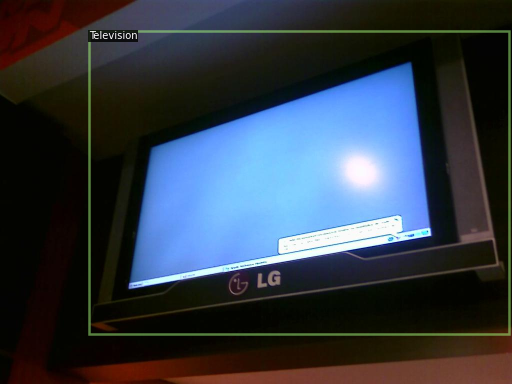

In [39]:
from google.colab.patches import cv2_imshow

visualize_sample(train_img_dicts, classes_metadata, n=1)


In [41]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 800    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 # only has one class (coffeemaker)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)

[06/01 10:57:33 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_b275ba.pkl: 167MB [00:13, 12.4MB/s]                           
Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model!


In [42]:
trainer.train()


[06/01 10:57:53 d2.engine.train_loop]: Starting training from iteration 0
[06/01 10:58:23 d2.utils.events]:  eta: 0:15:41  iter: 19  total_loss: 1.656  loss_cls: 1.167  loss_box_reg: 0.472  loss_rpn_cls: 0.026  loss_rpn_loc: 0.006  time: 1.1652  data_time: 0.0296  lr: 0.000005  max_mem: 2803M
[06/01 10:58:46 d2.utils.events]:  eta: 0:15:07  iter: 39  total_loss: 1.585  loss_cls: 1.075  loss_box_reg: 0.440  loss_rpn_cls: 0.022  loss_rpn_loc: 0.010  time: 1.1544  data_time: 0.0060  lr: 0.000010  max_mem: 2803M
[06/01 10:59:08 d2.utils.events]:  eta: 0:14:18  iter: 59  total_loss: 1.466  loss_cls: 0.954  loss_box_reg: 0.452  loss_rpn_cls: 0.028  loss_rpn_loc: 0.007  time: 1.1503  data_time: 0.0071  lr: 0.000015  max_mem: 2803M
[06/01 10:59:31 d2.utils.events]:  eta: 0:13:50  iter: 79  total_loss: 1.308  loss_cls: 0.814  loss_box_reg: 0.464  loss_rpn_cls: 0.018  loss_rpn_loc: 0.007  time: 1.1505  data_time: 0.0069  lr: 0.000020  max_mem: 2895M
[06/01 10:59:54 d2.utils.events]:  eta: 0:13:2

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
cfg.DATASETS.TEST = ("valid", )
predictor = DefaultPredictor(cfg)

In [0]:
#Predictions
import urllib.request
urllib.request.urlretrieve("https://www.nytimes.com/wirecutter/wp-content/uploads/2017/07/tv-2x1-fullres-004-1024x512.jpg", "00000004.jpg")
a='00000004.jpg'

{'instances': Instances(num_instances=1, image_height=512, image_width=1024, fields=[pred_boxes: Boxes(tensor([[215.4515,  21.1518, 778.7043, 401.2187]], device='cuda:0')), scores: tensor([0.9884], device='cuda:0'), pred_classes: tensor([1], device='cuda:0')])}


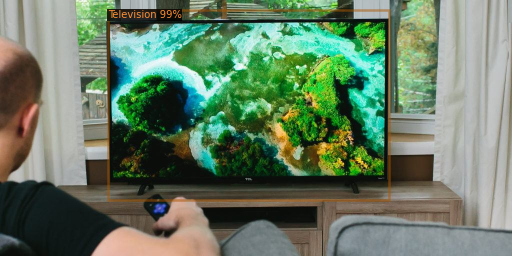

In [79]:
    predictor(cv2.imread(a))

    im = cv2.imread(a)
    outputs = predictor(im)
    print(outputs)
    v = Visualizer(im[:, :, ::-1],
                   metadata=classes_metadata, 
                   scale=0.5 
                   #instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imwrite("uu", v.get_image()[:, :, ::-1]) 
    cv2_imshow(v.get_image()[:, :, ::-1])